# Dataset de Iris

Crear 3 modelos de clasificación para el dataset de iris, uno para cada tipo de clasificador:

- Tree (DecisionTreeClassifier)
- Random Forest (RandomForestClassifier)
- Gradient Boosting (GradientBoostingClassifier)

## Cargar el dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data=np.c_[X, y], 
                  columns=iris.feature_names + ['target'])

df.target = df.target.astype(int)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.target.unique() # Esto es para ver cuantos valores unicos hay en la columna target

array([0, 1, 2])

## Visualización de los datos

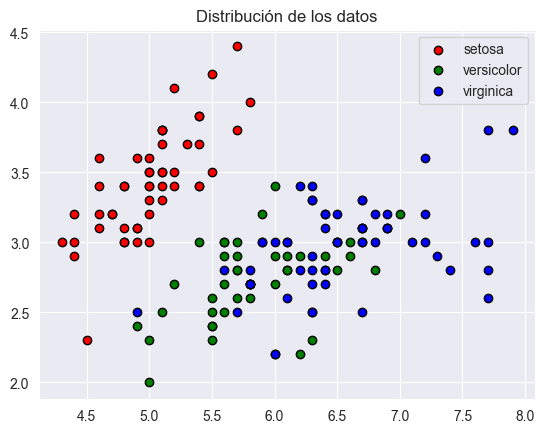

In [5]:
from matplotlib import pyplot as plt

COLORS = ['red', 'green', 'blue']

for i, data in enumerate(df.groupby('target').apply(lambda x: x[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values)):
    plt.scatter(data[:, 0], data[:, 1], c=COLORS[i], label=iris.target_names[i], edgecolor='k')
    
plt.title('Distribución de los datos')
plt.legend()
plt.show()

target
0    50
1    50
2    50
Name: target, dtype: int64


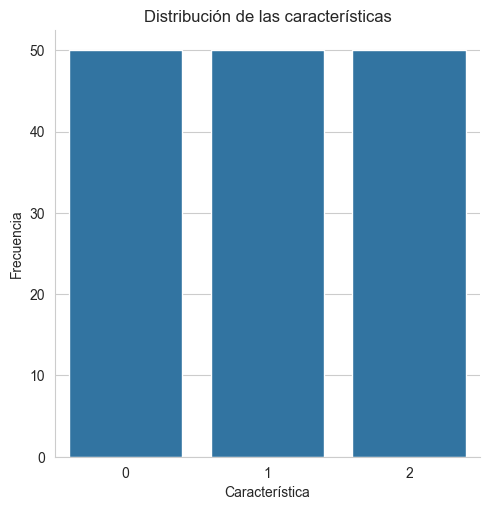

In [6]:
import seaborn as sns

sns.set_style("whitegrid")
print(df["target"].groupby(df["target"]).size())
sns.catplot(x="target", kind="count", data=df)
plt.title('Distribución de las características')
plt.xlabel('Característica')
plt.ylabel('Frecuencia')
plt.show()

## Preparación del conjunto de datos

In [7]:
from sklearn.model_selection import train_test_split

p_train = 0.7

train, test = train_test_split(df, test_size=p_train, random_state=42)

train.reset_index(inplace=True)
test.reset_index(inplace=True)

print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

print("Conjunto de entrenamiento:")
print(train.head())

print("Conjunto de prueba:")
print(test.head())

Train: (45, 6)
Test: (105, 6)
Conjunto de entrenamiento:
   index  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0      6                4.6               3.4                1.4   
1    112                6.8               3.0                5.5   
2    100                6.3               3.3                6.0   
3      2                4.7               3.2                1.3   
4     63                6.1               2.9                4.7   

   petal width (cm)  target  
0               0.3       0  
1               2.1       2  
2               2.5       2  
3               0.2       0  
4               1.4       1  
Conjunto de prueba:
   index  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0     73                6.1               2.8                4.7   
1     18                5.7               3.8                1.7   
2    118                7.7               2.6                6.9   
3     78                6.0               2.9                4

## Validación cruzada con GridSearchCV

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Crear los clasificadores
tree_classifier = DecisionTreeClassifier()
rnd_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()

# Parámetros para los clasificadores
params = {
    'tree': {
        'max_depth': [16, 12, 8, 4, 2, None],
        'criterion': ['gini', 'entropy']
    },
    'rnd': {
        'n_estimators': [4, 8, 16, 32, 64, 128],
        'max_depth': [16, 12, 8, 4, 2, None],
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy']
    },
    'gb': {
        'n_estimators': [4, 8, 16, 32, 64, 128],
        'max_depth': [16, 12, 8, 4, 2, None],
        'learning_rate': [0.1, 0.05, 0.02, 0.01]
    }
}

# GridSearchCV
results = {}
for name, classifier in zip(['tree', 'rnd', 'gb'], [tree_classifier, rnd_classifier, gb_classifier]):
    print(f"Clasificador: {name}")
    print(f"{'='*len(name)}")
    result = GridSearchCV(
        estimator=classifier,
        param_grid=params[name],
        cv=5
    )
    result.fit(X=train.drop(['target'], axis=1), y=train['target'])
    print(f"Mejores parámetros: {result.best_params_}")
    print()
    results[name] = result

Clasificador: tree
====
Mejores parámetros: {'criterion': 'gini', 'max_depth': 2}

Clasificador: rnd
===
Mejores parámetros: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 16, 'n_estimators': 4}

Clasificador: gb
==
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 32}


## Evaluación de los modelos

In [23]:
from sklearn.metrics import classification_report

X_train = train.drop(['target'], axis=1)
y_train = train['target']
X_test = test.drop(['target'], axis=1)
y_test = test['target']

# Crear los clasificadores
tree_classifier = DecisionTreeClassifier(**results['tree'].best_params_)
rnd_classifier = RandomForestClassifier(**results['rnd'].best_params_)
gb_classifier = GradientBoostingClassifier(**results['gb'].best_params_)

models = {
    'tree': tree_classifier,
    'rnd': rnd_classifier,
    'gb': gb_classifier
}

# Entrenar los clasificadores
for name, model in models.items():
    model.fit(X_train, y_train)
    
# Evaluar los clasificadores
for name, model in models.items():
    print(f"Clasificador: {name}")
    print(f"=============={'='*len(name)}")
    print(classification_report(y_test, model.predict(X_test)))
    print()

Clasificador: tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        32

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


Clasificador: rnd
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.92      1.00      0.96        33
           2       1.00      0.91      0.95        32

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105


Clasificador: gb
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.90      0.85      0.88        33
           2       

## Matriz de confusión

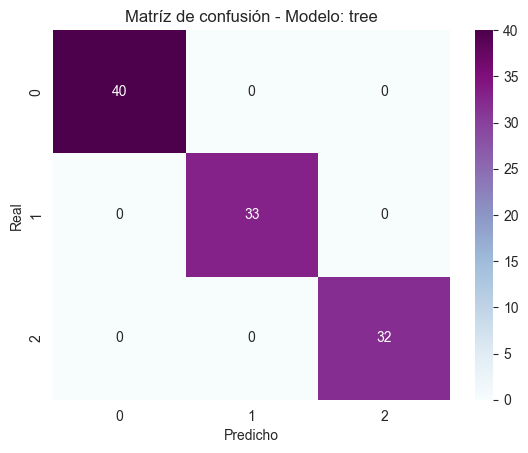

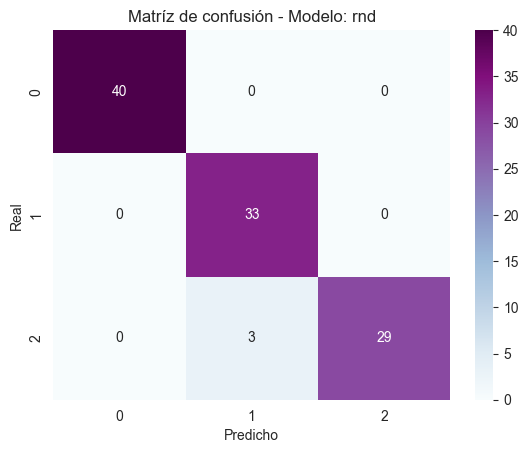

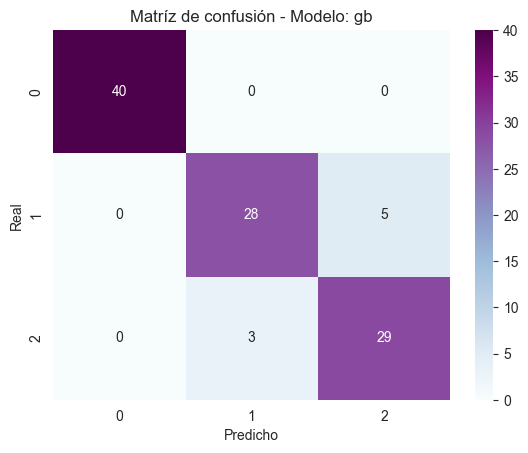

In [31]:
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, cmap='BuPu', fmt='d')
    plt.title(f'Matríz de confusión - Modelo: {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()